In [1]:
import nltk
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import *

import numpy as np
import numpy.linalg as LA

import pandas as pd

import matplotlib.pyplot as plt

from my_pickle import my_pickle_load

In [2]:
%matplotlib inline

In [3]:
df = my_pickle_load('pkl/ds_news_dec_2015.pkl')      

In [4]:
def clean_raw_data(df):
    ret = []
    for i in xrange(df.shape[0]):
        if (df.iloc[i]['body_len'] > 10):
            ret.append(df.iloc[i]['body'])
    return ret

In [5]:
articles = clean_raw_data(df)

In [6]:
def get_tokens(doc):
    lowers = doc.lower()
    no_punctuation = lowers.translate(None, string.punctuation)

    #remove the punctuation using the character deletion step of translate
    no_punctuation = lowers.translate(None, string.punctuation)
    tokens = nltk.word_tokenize(no_punctuation)
    
    filtered = [w for w in tokens if not w in stopwords.words('english')]
    
    #tokens_no_stopwords = [token for token in tokens if token not in stopwords.word('english')] 
    #return tokens_no_stopwords
    
#    print (len(filtered))
    
    return filtered

In [7]:

tot_tokens = [get_tokens(article) for article in articles]
print len(tot_tokens)

3723


In [8]:
print len(tot_tokens)

3723


In [9]:
flatten = [ inner for sublist in tot_tokens for inner in sublist ]

In [10]:
print len(flatten)

2124617


In [11]:
count = Counter(flatten)

In [12]:
most_common_words = count.most_common(50)
print most_common_words

[('data', 83102), ('science', 26291), ('learning', 26079), ('2015', 23672), ('machine', 18332), ('top', 16032), ('analytics', 15177), ('big', 14771), ('kdnuggets', 12469), ('dec', 12123), ('business', 10413), ('python', 9630), ('news', 8959), ('projects', 8737), ('10', 8301), ('deep', 7596), ('need', 7088), ('7', 6995), ('one', 6747), ('new', 6590), ('scientist', 5958), ('post', 5915), ('scientists', 5844), ('skills', 5822), ('nov', 5783), ('open', 5685), ('r', 5279), ('github', 5250), ('mining', 5194), ('source', 5170), ('software', 4791), ('2016', 4772), ('also', 4747), ('many', 4698), ('time', 4619), ('may', 4595), ('use', 4366), ('predictive', 4208), ('companies', 4161), ('14', 4126), ('get', 4085), ('tensorflow', 4007), ('next', 3917), ('become', 3850), ('information', 3823), ('hadoop', 3798), ('like', 3766), ('analysis', 3753), ('google', 3723), ('help', 3633)]


In [13]:
words, counts = zip(*most_common_words)

In [14]:
print len(counts)

50


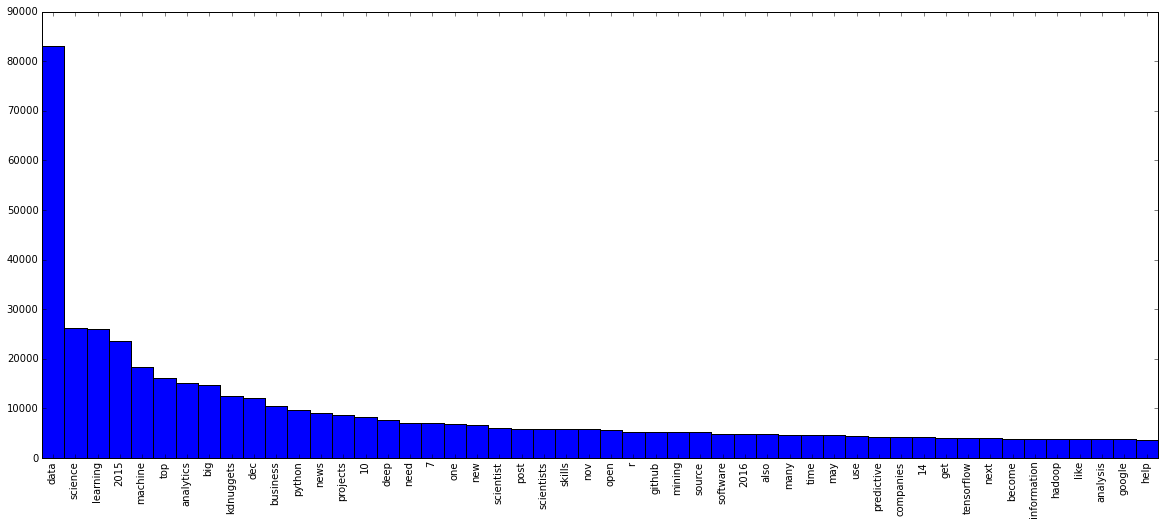

In [15]:
pos = np.arange(len(words))
width = 1.0     # gives histogram aspect to the bar diagram

plt.figure(figsize=(20,8))

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(words, rotation=90)

plt.bar(pos, counts, width, color='b')
plt.show()

In [16]:
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

stemmer = PorterStemmer()
stemmed = stem_tokens(flatten, stemmer)
most_common_words_stemmed = Counter(stemmed)
print most_common_words_stemmed.most_common(50)

[(u'data', 83169), (u'learn', 28208), (u'scienc', 26830), (u'2015', 23681), (u'machin', 18849), (u'analyt', 16448), (u'top', 16046), (u'big', 14778), (u'use', 14616), (u'kdnugget', 12469), (u'dec', 12123), (u'scientist', 11802), (u'busi', 11401), (u'predict', 10356), (u'project', 10297), (u'python', 9645), (u'news', 8959), (u'need', 8889), (u'10', 8301), (u'deep', 7598), (u'one', 7286), (u'compani', 7121), (u'7', 6995), (u'model', 6810), (u'post', 6675), (u'new', 6593), (u'skill', 6311), (u'sourc', 6080), (u'open', 5941), (u'nov', 5783), (u'develop', 5671), (u'work', 5614), (u'make', 5601), (u'time', 5576), (u'year', 5533), (u'mine', 5372), (u'r', 5279), (u'github', 5253), (u'process', 5162), (u'get', 5033), (u'manag', 5000), (u'help', 4905), (u'like', 4808), (u'softwar', 4800), (u'import', 4782), (u'2016', 4773), (u'research', 4757), (u'also', 4747), (u'mani', 4698), (u'becom', 4638)]


In [17]:
print len(most_common_words_stemmed)

69179


df2 = pd.DataFrame(list(most_common_words_stemmed), columns=['stemmed', 'count'])
words = df2['stemmed'].values
counts = df2['count'].values


pos = np.arange(len(words))
width = 1.0     # gives histogram aspect to the bar diagram

plt.figure(figsize=(20,8))

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(words, rotation=90)

plt.bar(pos, counts, width, color='b')
plt.show()

In [18]:

#Create your bigrams
bgs = nltk.bigrams(flatten)

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)

# for k,v in fdist.items():
#     print k,v

In [19]:
len(fdist)

963941

In [20]:
fds = fdist.most_common(50)
print fds

[(('data', 'science'), 23003), (('machine', 'learning'), 17638), (('big', 'data'), 13360), (('deep', 'learning'), 6832), (('data', 'scientist'), 5546), (('top', '10'), 5337), (('learning', 'projects'), 5082), (('10', 'machine'), 5079), (('projects', 'github'), 5071), (('data', 'scientists'), 4998), (('data', 'mining'), 4701), (('open', 'source'), 4529), (('data', 'data'), 3894), (('14', '2015'), 3823), (('dec', '14'), 3776), (('predictive', 'analytics'), 3071), (('top', 'stories'), 2913), (('become', 'data'), 2716), (('top', '20'), 2715), (('vs', 'python'), 2648), (('r', 'vs'), 2647), (('python', 'data'), 2641), (('python', 'machine'), 2634), (('learning', 'python'), 2610), (('source', 'projects'), 2587), (('7', '2015'), 2587), (('20', 'python'), 2586), (('science', 'iot'), 2585), (('skills', 'need'), 2578), (('learning', 'open'), 2575), (('need', 'become'), 2574), (('tensorflow', 'disappoints'), 2569), (('science', 'winner'), 2568), (('falls', 'shallow'), 2564), (('disappoints', 'goog

In [21]:
words, counts = zip(*fds)

In [22]:
print words

(('data', 'science'), ('machine', 'learning'), ('big', 'data'), ('deep', 'learning'), ('data', 'scientist'), ('top', '10'), ('learning', 'projects'), ('10', 'machine'), ('projects', 'github'), ('data', 'scientists'), ('data', 'mining'), ('open', 'source'), ('data', 'data'), ('14', '2015'), ('dec', '14'), ('predictive', 'analytics'), ('top', 'stories'), ('become', 'data'), ('top', '20'), ('vs', 'python'), ('r', 'vs'), ('python', 'data'), ('python', 'machine'), ('learning', 'python'), ('source', 'projects'), ('7', '2015'), ('20', 'python'), ('science', 'iot'), ('skills', 'need'), ('learning', 'open'), ('need', 'become'), ('tensorflow', 'disappoints'), ('science', 'winner'), ('falls', 'shallow'), ('disappoints', 'google'), ('google', 'deep'), ('importance', 'data'), ('7', 'steps'), ('musthave', 'skills'), ('learning', 'falls'), ('steps', 'mastering'), ('previous', 'post'), ('mastering', 'machine'), ('iot', 'business'), ('next', 'post'), ('humor', 'cartoons'), ('science', 'humor'), ('learn

In [23]:
words_zip = [' '.join(word) for word in words]
print words_zip

['data science', 'machine learning', 'big data', 'deep learning', 'data scientist', 'top 10', 'learning projects', '10 machine', 'projects github', 'data scientists', 'data mining', 'open source', 'data data', '14 2015', 'dec 14', 'predictive analytics', 'top stories', 'become data', 'top 20', 'vs python', 'r vs', 'python data', 'python machine', 'learning python', 'source projects', '7 2015', '20 python', 'science iot', 'skills need', 'learning open', 'need become', 'tensorflow disappoints', 'science winner', 'falls shallow', 'disappoints google', 'google deep', 'importance data', '7 steps', 'musthave skills', 'learning falls', 'steps mastering', 'previous post', 'mastering machine', 'iot business', 'next post', 'humor cartoons', 'science humor', 'learning prediction', 'news follow', '2015 7']


In [24]:
print counts

(23003, 17638, 13360, 6832, 5546, 5337, 5082, 5079, 5071, 4998, 4701, 4529, 3894, 3823, 3776, 3071, 2913, 2716, 2715, 2648, 2647, 2641, 2634, 2610, 2587, 2587, 2586, 2585, 2578, 2575, 2574, 2569, 2568, 2564, 2564, 2560, 2559, 2558, 2557, 2557, 2547, 2547, 2543, 2537, 2533, 2531, 2529, 2525, 2524, 2524)


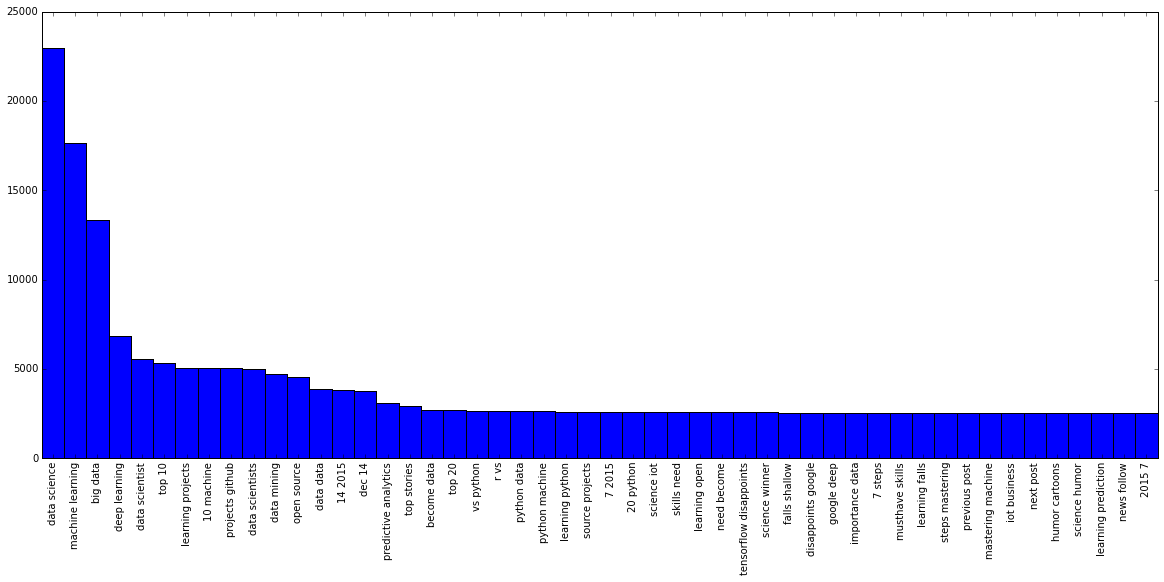

In [25]:
pos = np.arange(len(words_zip))
width = 1.0     # gives histogram aspect to the bar diagram

plt.figure(figsize=(20,8))

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(words_zip, rotation=90)

plt.bar(pos, counts, width, color='b')
plt.show()

def plot_freqdist(fd, num = 0, cumulative = False, title = None):
    import pylab
    # Set up parameters
    if num <= 0:
        num = fd.B
    # Get samples and frequencies
    samples, freq, accu = [], [], 0
    for s, f in fd.most_common(num):
        accu = accu + f if cumulative else f
        samples.append(s)
        freq.append(accu)
    # Create plot
    pylab.grid(True, color = 'silver')
    if title:
        pylab.title(title)
    pylab.plot(freq, linewidth = 2)
    pylab.xticks(range(len(samples)), samples, rotation = 90)
    pylab.xlabel('Samples')
    pylab.ylabel('Cumulative Counts' if cumulative else 'Counts')
    pylab.show()

plot_freqdist(fdist, 50)